# Intro to R Notebook

## <u>Contents</u>

## Part I
1. [Variables, if statements, functions, printing output](#basics)
2. [Dataframes](#dataframes)
3. [Exercise](#ex1)
4. [An example of plotting](#plotting)
5. [Logging output](#logging)

## Part II
1. [Regression](#regression)
    1. [Robust standard errors](#robust)
2. [Merging data](#merging)
3. [Other data manipulation tasks](#datamanip)
4. [Creating a regression table](#output)
5. [Project](#project)
***

# <u>Part I</u>

# Variables, if statements, functions, printing output <a name="basics"></a>
***

In [5]:
x<-3
print(x)

[1] 3


In [6]:
if(x<5){
    print("The value of x is less than 5")
} else{
    print("The value of x is greater than or equal to 5")
}

[1] "The value of x is less than 5"


In [14]:
add5<-function(x){
    if(is.numeric(x)){
        theanswer<-x+5
        return(theanswer)
    }
    else{
        print("Argument x is not a number")
        return(0)
    }
}
print(paste0("42 plus five is equal to: ", add5(52)))

[1] "42 plus five is equal to: 57"


In [15]:
print(add5("sdafgdsfg"))

[1] "Argument x is not a number"
[1] 0


In [16]:
running_sum<-0
for (i in 1:10){
  running_sum = running_sum+i
}
print(running_sum)

[1] 55


In [17]:
1:10

[1]  1  2  3  4  5  6  7  8  9 10

# Data frames <a name="dataframes"></a>
***
### The basic useful way to manage data in R is with a so-called *data frame*. We can create one manually:

In [94]:
df<-data.frame(variable1 = c(5,7,9), variable2=c(2,4,6))
df

variable1,variable2
5,2
7,4
9,6


### It's easy to add functions of variables as new variables. For renaming and dropping variables, see the next lesson notebook.

In [95]:
df$variable2_squared <- df$variable2^2
df

variable1,variable2,variable2_squared
5,2,4
7,4,16
9,6,36


## To make things more interesting, let's loading in some real data.
***
### Download "qcew_wages_industrybyyear_naics.csv" from <a href="https://raw.githubusercontent.com/leonardgoff/QCEW-Historical-Wages/master/qcew_wages_industrybyyear_naics.csv" download>here</a> and save it to your project `raw data/` folder.
### This data gives the US average wage by industry and year, from the Quarterly Census of Employment and Wages

In [2]:
projectpath<-"C:/Users/Len/Dropbox/Teaching/Data TA/R tutorial/sample project/"
df <- read.csv(paste0(projectpath,"raw data/qcew_wages_industrybyyear_naics.csv"))

## Exploring/working with a dataframe by "*slicing*" it, i.e. indexing it as a matrix
***
### We can look at the first 5 rows of the dataframe:

In [29]:
df[1:5,c('naics','wage')]

naics,wage
1111,14667.21
1112,12264.32
1113,10557.79
1114,14888.62
1119,13482.87


In [6]:
# A "comment" in R can be made with the "#" symbol
# Let's ask R to print how many records are in df:
print(length(df[,1]))

[1] 8008


In [10]:
#First five values of wage only:
df$wage[1:5]

[1] 14667.21 12264.32 10557.79 14888.62 13482.87

In [28]:
print(paste0("Mean industry wage: ", mean(df$wage)))
print(paste0("Max industry wage: ", max(df$wage)))

[1] "Mean industry wage: 41390.2396774684"
[1] "Max industry wage: 226189.599662489"


In [40]:
#What if I want to display these more pretty-like?
print(paste0("Mean industry wage: $", round(mean(df$wage),2)))
print(paste0("Mean industry wage: $", round(mean(df$wage),-3)/1000, "k"))


[1] "Mean industry wage: $41390.24"
[1] "Mean industry wage: $41k"


## Suppose we wanted to look up the wage for the coal mining industry in year 2000. The 4-digit "NAICS code" for this industry is 2121. We can do this by slicing `df` with the logical vector `df$naics==2121 & df$year==1990`:

In [14]:
df[df$naics==2121 & df$year==1990,]
#Be careful, if you used "&&" here it would only apply the AND operation on the first row!

,year,naics,wage
21,1990,2121,39767.71


# <span style="color:blue">Exercise</span> <a name="ex1"></a>
***
## What is the average wage for workers in the Logging industry in 2015?
## Industry codes are listed <a href="https://data.bls.gov/cew/doc/titles/industry/industry_titles.htm">here</a>
## Note, this dataset has records for the 4-digit version of industry codes. The longer codes (e.g. 5 digits) are more specific and the data is not dissagregated to that level in this dataset

### Answer: $41,748.04

# An example of plotting <a name="plotting"></a>
***

## Suppose we wanted to plot average nominal wages for the coal industry over time:

In [15]:
#Step one: create a dataframe with average manufacturing wage, by year
dfcoal<-df[df$naics==2121,]
dfcoal

,year,naics,wage
21,1990,2121,39767.71
330,1991,2121,40668.72
639,1992,2121,42295.11
948,1993,2121,41716.56
1257,1994,2121,44389.39
1566,1995,2121,45734.90
1875,1996,2121,48031.03
2184,1997,2121,49145.38
2493,1998,2121,50243.96
2802,1999,2121,50638.49


## We'll use the `ggplot` plotting library for this, which must be installed. `ggplot` has a formula based syntax that takes some getting used to.

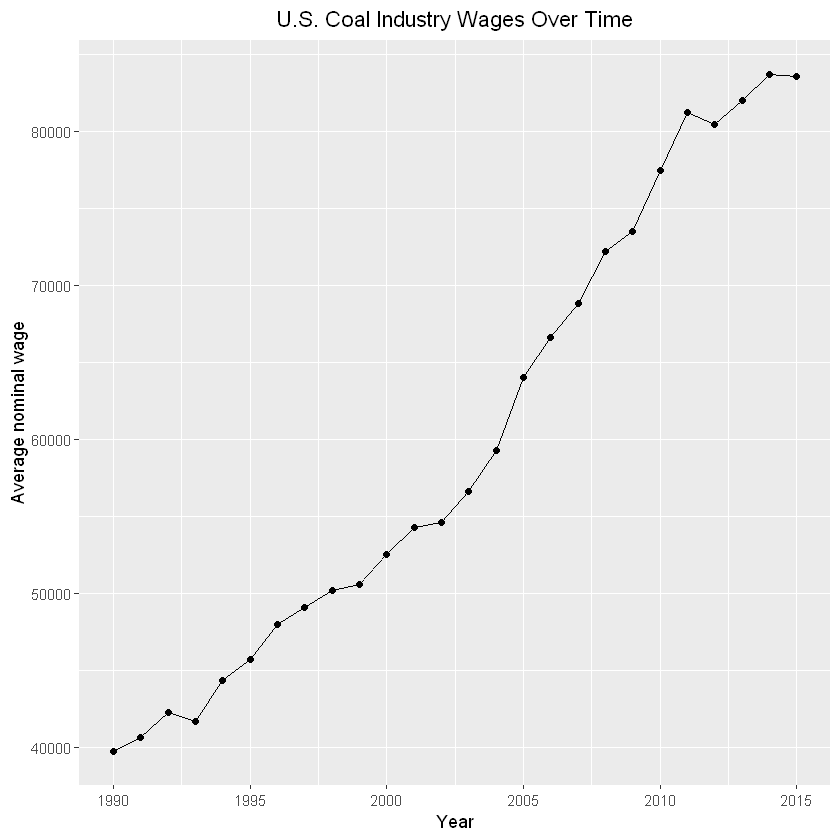

In [16]:
#install.packages("ggplot2")
library(ggplot2)

#ggplot titles by default show up on the left. I like them in the middle:
theme_update(plot.title = element_text(hjust = 0.5))

ggplot(data=dfcoal, aes(x=year, y=wage, group=1)) +
  geom_line()+
  geom_point()+
  labs(title="U.S. Coal Industry Wages Over Time", x="Year", y = "Average nominal wage")

## Follow up question ("extra credit"): have these nominal wages kept up with inflation? You could find out by integrating data from <a href="https://fred.stlouisfed.org/tags/series?t=inflation">here</a> .

## We can also save this plot to a file (e.g. to put it in our paper). Remember the project folder!

In [17]:
ggsave(filename = paste0(projectpath,'figures/coal_wagesbyyear.png'), width = 10, height = 5, dpi=500)

# Logging output <a name="logging"></a>
***

## If you have experience with Stata, you might be used to creating a "log file" from your code. We can do a similar thing in R, using the `sink` command:

In [9]:
projectpath<-"C:/Users/Len/Dropbox/Teaching/Data TA/R tutorial/sample project/"

#split=TRUE allows output to also go to the screen (otherwise you would only see it in the log file)
#append=FALSE tells R to overwrite "mylog.txt" rather than appending to itself, if it already exists
sink(file=paste0(projectpath,'/log files/mylog.txt'),split=TRUE, append=FALSE)

## This doesn't work in a Jupyter notebook, so copy this code into R Studio

### Note: it's good practice to close the connection to this file at the end of your code (this makes more sense when working in RStudio in which your have a ".R" script file). The following code will close any open file connections:

In [11]:
sink.reset <- function(){
  for(i in seq_len(sink.number())){
    sink(NULL)
  }
}

# <u> Part II</u>

# Regression analysis <a name="regression"></a>
***
## Let's move on to regression analysis. For this, download <a href="http://www.columbia.edu/~ltg2111/teaching/wages_bycounty_yr2000.csv">this data set</a> to your `raw data/` folder. Or, you can read it right of the web (and save a local copy):

In [15]:
df<- read.csv("http://www.columbia.edu/~ltg2111/teaching/wages_bycounty_yr2000.csv")
write.csv(df, paste0(projectpath,"raw data/wages_bycounty_yr2000.csv"))

## This data set contains the average wage and employment count by US county (`fips') in the year 2000:

In [9]:
df <- read.csv(paste0(projectpath,"raw data/wages_bycounty_yr2000.csv"))
df[1:5,]

X,fips,wage,employment
1,1001,24803.96,8844
2,1003,21926.45,40999
3,1005,22849.07,9890
4,1007,20039.41,2686
5,1009,21934.78,7372


## Suppose we want to run a regression of wages on employment in this data. If we just wanted to visualize the regression line, we could let `ggplot` do it all automatically:

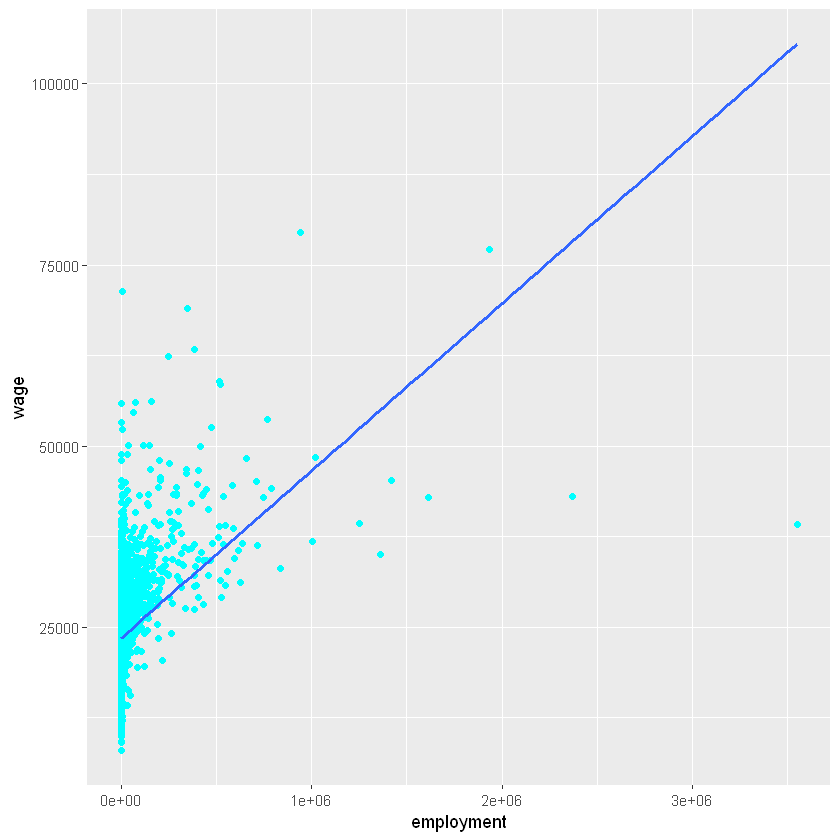

In [131]:
#Scatterplot of wage vs employment with regression line

library(ggplot2)
ggplot(data = df, aes(x = employment,y = wage)) + 
  geom_point(color='cyan') +
  geom_smooth(method = "lm", se = FALSE)

### Note: the above relationship does not look particularly linear overall. We might want to add employment squared as a regresssor as well, or use so-called *non-parametric* regression techniques that let the curve take an arbitrary shape.

### By comparing the linear regression line to the  `loess` local smoother, we can assess the linearity if the relationship. Here we zoom in on counties with average wage between 20-30k and employment below 100k, where the bulk of the data is.

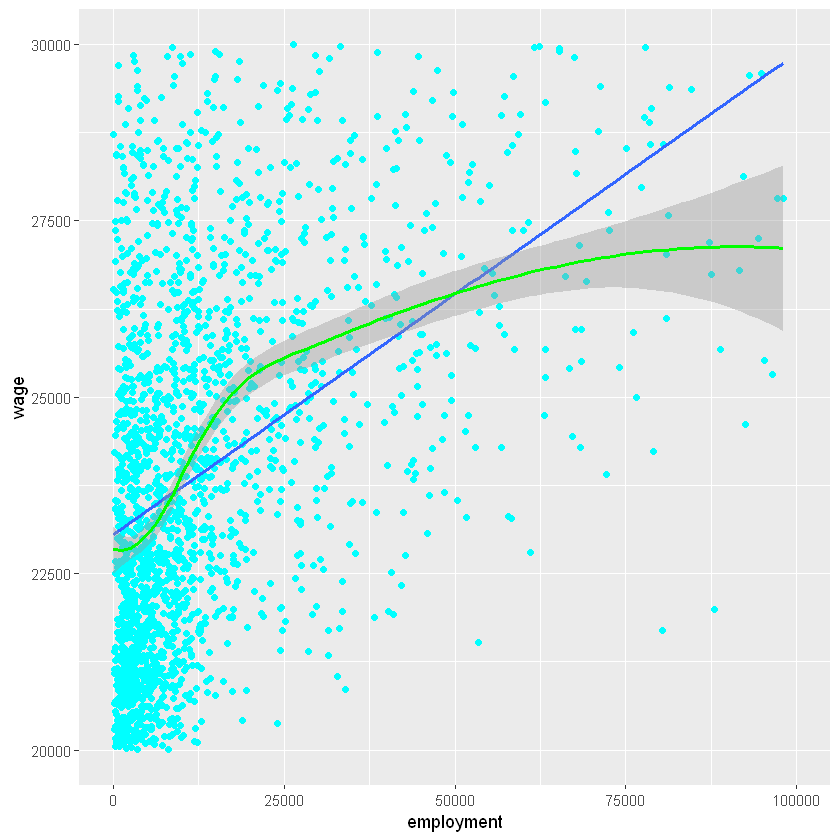

In [128]:
ggplot(data = df, aes(x = employment,y = wage)) +
  ylim(20000, 30000) + xlim(0,10^5) +
  geom_point(color='cyan') +
  geom_smooth(method = "lm", se = FALSE) +
  geom_smooth(method = "loess", color="green")

## Now let's perform the linear regression using the "linear model" or `lm` command to see the estimated coefficients:

In [122]:
lm(wage~employment,data=df)


Call:
lm(formula = wage ~ employment, data = df)

Coefficients:
(Intercept)   employment  
  2.345e+04    2.311e-02  


In [53]:
#It's usually useful to save the estimated model as an object:
model1<-lm(wage~employment,data=df)
summary(model1)


Call:
lm(formula = wage ~ employment, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-66231  -3382   -681   2471  47744 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.345e+04  1.041e+02  225.33   <2e-16 ***
employment  2.311e-02  8.014e-04   28.84   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5701 on 3214 degrees of freedom
Multiple R-squared:  0.2056,	Adjusted R-squared:  0.2053 
F-statistic: 831.7 on 1 and 3214 DF,  p-value: < 2.2e-16


## Important! The standard errors that `lm` computes by default assume homoskedasticity, which is not reasonable in most social science contexts. Based on the above scatterplot, would it be reasonable to assume homoskedastic errors for this regression? Doesn't look like it.

## To get heteroskedasticity-robust standard errors, you can use the `sandwich` library: <a name="robust"></a>

In [54]:
#install.packages("sandwich")
library(sandwich)
cov <- vcovHC(model1, type = "HC")
model1.robustses <- sqrt(diag(cov))
model1.robustses

(Intercept)   employment 
1.714209e+02 5.068381e-03

In [55]:
model1$coefficients

(Intercept)   employment 
2.345238e+04 2.311182e-02

In [56]:
#If we wanted to supress the constant:
lm(wage~employment+0,data=df)


Call:
lm(formula = wage ~ employment + 0, data = df)

Coefficients:
employment  
   0.06989  


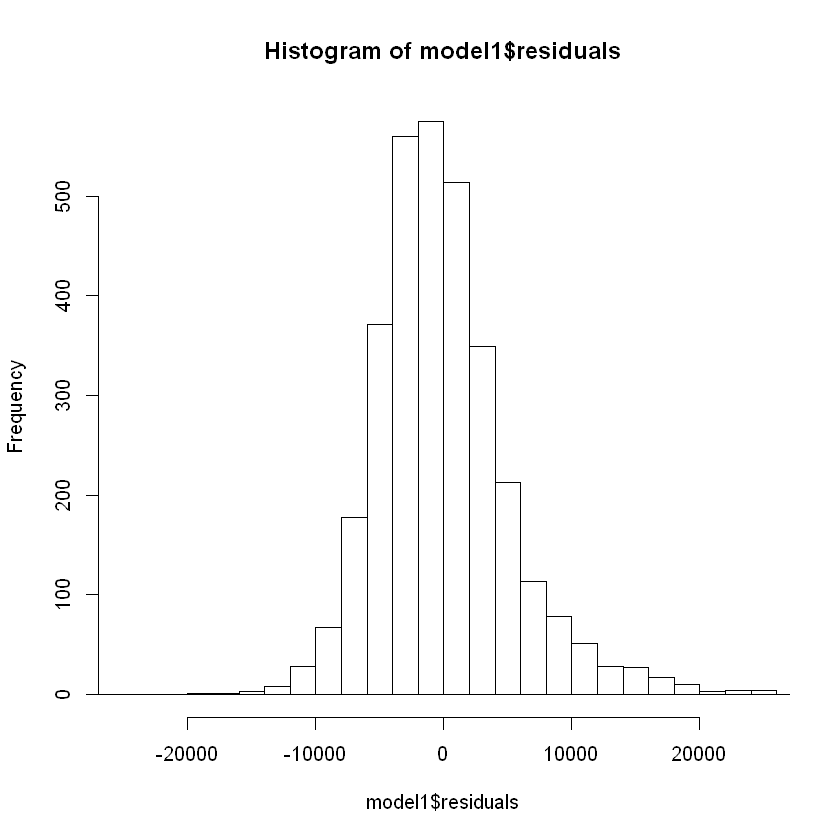

In [57]:
#Suppose we wanted to inspect the residuals:
hist(model1$residuals, breaks=50,xlim=c(-25000,25000))

# Merging Data <a name="merging"></a>
***
## Now we've found another data source that includes unemployment by county in 2016. How can we combine this with our existing dataset, to perform a multiple linear regression?

## This data is available <a href="https://raw.githubusercontent.com/plotly/datasets/master/fips-unemp-16.csv">here</a>. Download it and save to your `raw data/` folder.

In [132]:
temp<- read.csv("https://raw.githubusercontent.com/plotly/datasets/master/fips-unemp-16.csv")
write.csv(temp, paste0(projectpath,"raw data/fips-unemp-16.csv"))

In [133]:
df2<-read.csv(paste0(projectpath,"raw data/fips-unemp-16.csv"))

## We can perform the merge using the `merge` command:

In [134]:
merged_data <- merge(df, df2, by="fips", all.x = TRUE, all.y=FALSE)
merged_data[1:5,]

fips,X.x,wage,employment,X.y,unemp
1001,1,24803.96,8844,1,5.3
1003,2,21926.45,40999,2,5.4
1005,3,22849.07,9890,3,8.6
1007,4,20039.41,2686,4,6.6
1009,5,21934.78,7372,5,5.5


### Note that `by` here can be a list of variables to merge on combinations of, e.g. `by=c(var1, var2)`.

### The options `all.x = TRUE, all.y=FALSE` makes sure to keep all of our original county observations, even if we can't find an unemployment number for them. Counties that show up only in the unemployment dataset are ignored.

### We can see that 9 counties were unmatched, because they have NA's for `unemp`:

In [135]:
summary(merged_data)
merged_data[is.na(merged_data$unemp),]

      fips            X.x              wage         employment     
 Min.   : 1001   Min.   :   1.0   Min.   : 8053   Min.   :     19  
 1st Qu.:19039   1st Qu.: 804.8   1st Qu.:20264   1st Qu.:   2265  
 Median :30028   Median :1608.5   Median :23167   Median :   6308  
 Mean   :31464   Mean   :1608.5   Mean   :24230   Mean   :  33644  
 3rd Qu.:46114   3rd Qu.:2412.2   3rd Qu.:26846   3rd Qu.:  18226  
 Max.   :78030   Max.   :3216.0   Max.   :79544   Max.   :3548191  
                                                                   
      X.y             unemp       
 Min.   :   1.0   Min.   : 1.700  
 1st Qu.: 809.5   1st Qu.: 4.000  
 Median :1611.0   Median : 5.000  
 Mean   :1612.3   Mean   : 5.456  
 3rd Qu.:2415.5   3rd Qu.: 6.300  
 Max.   :3219.0   Max.   :23.500  
 NA's   :9        NA's   :9       

,fips,X.x,wage,employment,X.y,unemp
86,2201,86,27511.05,1165,NA,NA
88,2232,88,28550.83,1068,NA,NA
91,2270,91,16724.99,878,NA,NA
92,2280,92,25470.78,1736,NA,NA
2412,46113,2412,22689.80,2244,NA,NA
2909,51515,2909,25314.70,3970,NA,NA
3214,78010,3214,28077.12,12053,NA,NA
3215,78020,3215,20178.25,1991,NA,NA
3216,78030,3216,22985.71,14565,NA,NA


### On the rest of the data, let's do an OLS regression of wage on employment count and unemployment rate (counties with missing `unemp` will be ignored by the `lm` command):

In [136]:
model2<-lm(wage~employment+unemp,data=merged_data)
summary(model2)


Call:
lm(formula = wage ~ employment + unemp, data = merged_data)

Residuals:
   Min     1Q Median     3Q    Max 
-64582  -3441   -673   2457  48149 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.565e+04  2.575e+02  99.590   <2e-16 ***
employment   2.261e-02  7.934e-04  28.501   <2e-16 ***
unemp       -3.997e+02  4.294e+01  -9.308   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5631 on 3204 degrees of freedom
  (9 observations deleted due to missingness)
Multiple R-squared:  0.2267,	Adjusted R-squared:  0.2262 
F-statistic: 469.6 on 2 and 3204 DF,  p-value: < 2.2e-16


In [137]:
# Again, if we are interested in statistical inference on our coefficients, we should generally use
# standard errors that are valid under heteroskedasticity:
cov <- vcovHC(model2, type = "HC")
model2.robustses <- sqrt(diag(cov))
model2.robustses

(Intercept)   employment        unemp 
3.596063e+02 4.958349e-03 5.005288e+01

## Aside: deleting, renaming, ordering variables in a dataframe <a name="datamanip"></a>

### First, let's drop these meaningless variables X.x and X.y. These come from the fact that there was a variable named "X" in both datasets before the merge, which simply counted the row number.

In [138]:
head(merged_data)

fips,X.x,wage,employment,X.y,unemp
1001,1,24803.96,8844,1,5.3
1003,2,21926.45,40999,2,5.4
1005,3,22849.07,9890,3,8.6
1007,4,20039.41,2686,4,6.6
1009,5,21934.78,7372,5,5.5
1011,6,20437.67,2774,6,7.2


In [141]:
somevars <- names(merged_data) %in% c("X.x", "X.y")
cleaned_data <- merged_data[!somevars]
head(cleaned_data)

fips,wage,employment,unemp
1001,24803.96,8844,5.3
1003,21926.45,40999,5.4
1005,22849.07,9890,8.6
1007,20039.41,2686,6.6
1009,21934.78,7372,5.5
1011,20437.67,2774,7.2


### Some other data frame manipulation tasks that may be useful:

In [142]:
#Create a new variable that groups employment into 4 quartiles
qnt <- quantile(cleaned_data$employment)
cleaned_data$employment_quartile<-cut(cleaned_data$employment,unique(qnt),include.lowest=TRUE)

#Sort the data frame by employment
cleaned_data <- cleaned_data[order(cleaned_data$employment),]

#Re-order first few columns in data frame.
#In this exmaple, make "employment" and "employment_quartile" first and retain ordering of the rest
somecols <- c("employment", "employment_quartile");
cols <- c(somecols, names(cleaned_data)[-which(names(cleaned_data) %in% somecols)]);
cleaned_data <- cleaned_data[cols]

#rename the "fips" variable to "county"
colnames(cleaned_data)[which(colnames(cleaned_data) == 'fips')[[1]]] <- "county"

head(cleaned_data)

,employment,employment_quartile,county,wage,unemp
2028,19,"[19,2.26e+03]",38087,13620.74,2.5
1629,32,"[19,2.26e+03]",30069,16411.38,4.8
1731,50,"[19,2.26e+03]",31165,15092.88,2.8
1613,61,"[19,2.26e+03]",30037,15563.97,4.4
1653,61,"[19,2.26e+03]",31005,13003.02,6.2
1654,61,"[19,2.26e+03]",31007,19724.15,3.8


### If you have experience with Stata, you'll notice that doing some of these things was more tedious than in Stata.

### There are some tools that make data manipulation easier in R. One is the `dplyr` package, another is `data.table`

### For example, with `data.table`, we can quickly extract the average employment across counties within each quartile of employment

In [117]:
library(data.table)
dt = data.table(cleaned_data)
dt <- dt[, .(mean(employment)), keyby = .(employment_quartile)]
#the column with mean employment ends up with the non-descriptive name "V1", so let's change it
colnames(dt)[[2]]<-"mean_emp_byqt"
dt

employment_quartile,mean_emp_byqt
"[19,2.26e+03]",1159.604
"(2.26e+03,6.31e+03]",4009.684
"(6.31e+03,1.82e+04]",10953.877
"(1.82e+04,3.55e+06]",118451.797


In [118]:
#We may want to merge this information back to the original dataset:
cleaned_data <- merge(cleaned_data, dt, by="employment_quartile")
head(cleaned_data)

employment_quartile,employment,county,wage,unemp,mean_emp_byqt
"(1.82e+04,3.55e+06]",18335,17177,30041.86,5.8,118451.8
"(1.82e+04,3.55e+06]",18434,48203,29760.17,6.1,118451.8
"(1.82e+04,3.55e+06]",18435,27131,28022.64,3.5,118451.8
"(1.82e+04,3.55e+06]",18449,36105,22923.15,4.8,118451.8
"(1.82e+04,3.55e+06]",18460,5093,27086.02,6.8,118451.8
"(1.82e+04,3.55e+06]",18534,48231,28889.91,4.3,118451.8


### Suppose we wanted the average of the variables `employment` and `wage` across all counties. We could do this with the lapply funciton, which would allow us to loop through any set of variable names and ask for its mean:

In [119]:
nothing<-lapply(c("employment", "wage"), function(thisvar){
  print(paste0("Mean of variable ", thisvar, ": ",mean(cleaned_data[,thisvar])))
})

[1] "Mean of variable employment: 33643.7406716418"
[1] "Mean of variable wage: 24229.9502373469"


<a name="output"></a>
# Now that we have several models estimated, how can we neatly display all the output?
***
## This can be done with the `stargazer` libary:

In [23]:
#install.packages("stargazer")
library("stargazer")
stargazer(model1, model1, model2, se=list(NULL, model1.robustses, model2.robustses), column.labels=c("not robust","robust", "robust"), align=TRUE, type="text")


                                                 Dependent variable:                             
                    -----------------------------------------------------------------------------
                                                        wage                                     
                           not robust                  robust                    robust          
                               (1)                       (2)                       (3)           
-------------------------------------------------------------------------------------------------
employment                  0.023***                  0.023***                  0.023***         
                             (0.001)                   (0.005)                   (0.005)         
                                                                                                 
unemp                                                                          -399.665***       
                   

### We'll also save a LaTeX version of this table into a file, to use in the next lecture on LaTeX:

In [125]:
stargazer(model1, model1, model2, se=list(NULL, model1.robustses, model2.robustses), column.labels=c("not robust","robust", "robust"), align=TRUE, float=F, type="latex", out=paste0(projectpath,"/tables/table1.tex"))


% Table created by stargazer v.5.2.2 by Marek Hlavac, Harvard University. E-mail: hlavac at fas.harvard.edu
% Date and time: Wed, Oct 30, 2019 - 6:00:38 PM
% Requires LaTeX packages: dcolumn 
\begin{tabular}{@{\extracolsep{5pt}}lD{.}{.}{-3} D{.}{.}{-3} D{.}{.}{-3} } 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
 & \multicolumn{3}{c}{\textit{Dependent variable:}} \\ 
\cline{2-4} 
\\[-1.8ex] & \multicolumn{3}{c}{wage} \\ 
 & \multicolumn{1}{c}{not robust} & \multicolumn{1}{c}{robust} & \multicolumn{1}{c}{robust} \\ 
\\[-1.8ex] & \multicolumn{1}{c}{(1)} & \multicolumn{1}{c}{(2)} & \multicolumn{1}{c}{(3)}\\ 
\hline \\[-1.8ex] 
 employment & 0.023^{***} & 0.023^{***} & 0.023^{***} \\ 
  & (0.001) & (0.005) & (0.005) \\ 
  & & & \\ 
 unemp &  &  & -399.665^{***} \\ 
  &  &  & (50.053) \\ 
  & & & \\ 
 Constant & 23,452.380^{***} & 23,452.380^{***} & 25,647.870^{***} \\ 
  & (104.080) & (171.421) & (359.606) \\ 
  & & & \\ 
\hline \\[-1.8ex] 
Observations & \multicolumn{1}{c}{3,216} & \multicolumn{1

<a name="project"></a>
<h1><span style="color:blue">Project!</span></h1>

## Suppose we want to add to this regression a "fixed effect" for each state. See if you can figure out how to do this.

## Some hints:
- the first two digits of a FIPS code are constant within a state
- dummies for each value of a variable can be added to the regression by creating a "factor variable", e.g. `df$state.f <- factor(df$state)`


<h1><span style="color:blue">"Extra credit"!</span></h1>

## If the first task was too easy, now try adding to the regression a dummy variable for the first letter of the county's name beginning with a "W". County names can be downloaded here: https://www2.census.gov/programs-surveys/popest/geographies/2017/all-geocodes-v2017.xlsx